## Final Project Submission

Please fill out:
* Student name: Maryam Ghaffari
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Overview

Realtor.com is a real estate listing website operated by the News Corp subsidiary Move, Inc.  It was relaunched in 1996 as a public website displaying property listings. Now they want to offer valuations of houses using machine learning techniques to their customers. The company asked to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. They need this model to guide real estate investors who are using the platform to have a better decision on which house is more valuable to invest. 

# Methadology

The general research strategy in this project is to use OSEMN framework on the King County House Sales dataset. The process includes the below steps:

 - Obtain data
 - Scrub
 - Explore
 - Model
 - iNterpret
 

## Obtain data 

The very first step of the project is obtain data. We obtain the data that we need from 'kc_house_data.csv' file. Obtain data starts with importing needed libraries. 

In [1]:
#Importing the libraries used throughout the project
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

import os

#Add plots to Jupyter noteboos
%matplotlib inline

# Suppress certain warning messages created from the output of 'iffy' commands
import warnings
warnings.filterwarnings('ignore')

At first, we should check our dataframe and decide how to clean the data. Through .info() and .head() methods we can have a general idea about this dataframe. In addition with .isnull() and .duplicated() methods, we can decide for better selection

In [2]:
# Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv ('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


To check all the name of colummns we can use .set_option() method.

In [3]:
# Show all columns when displaying dataframes 
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503



# Scrub data

To begin with the dataframe we should fixing bad data in the data set. The first step to cleaning a dataframe is to deal with type of data, missing and duplicated values because they might cause mislead in results. 

To optain general view of the data we can check type of data with .info() method  and we can have statistics of our numeric columns with describe() method.

In [4]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


According to the info and information that we have, we decided to drop some columns.

In [6]:
#Drop specified columns
drop_columns= ['date',
'view','sqft_above', 'sqft_basement', 'yr_renovated','zipcode','lat','long','long','sqft_living15','sqft_lot15']
df_limited = df.drop(columns = drop_columns, axis = 1)
df_limited.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [7]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


According to the info () , waterfront, condition, and grade data type is object and for doing numerical analysis we should convert them to the numeric values.

In [8]:
#Detect missing values 
df_limited.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Deciding on how to deal with missing value is an important part of data cleaning. For null values, based on the percentage of missing values we will decide to how to deal with them.

In [9]:
def null_per (column, df):
    null_value_percentage = (column.isnull().sum() / len(df)) *100
    return null_value_percentage
    

In [10]:
# using the define function to calculate the percentage of null values
waterfront_null_per = null_per( df_limited['waterfront'], df_limited)
print (f'The percentage of missing waterfront value is {round(waterfront_null_per,2)}%.')


The percentage of missing waterfront value is 11.0%.


In [11]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
df_limited['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

Most properties do not have a view of a waterfront so the most common value for this feature is No. So we can replace the NaN value with 0.

In [13]:
df_limited['waterfront'].fillna(value = 'NO' , inplace = True)

In [14]:
df_limited['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [15]:
# Detect missing values.
df_limited['waterfront'].isnull().sum()

0

In [16]:
df_limited.duplicated().sum()

3

In [17]:
df_limited.loc[df_limited.duplicated(),:]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,NO,Good,8 Good,1936
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,NO,Average,9 Better,2001
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,NO,Average,8 Good,2009


In [18]:
df_limited['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

 Check for other placeholder values with the .isin() method chained with .any().

In [19]:
# Check for placeholders throughout the entire dataframe
df_limited.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

id             False
price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
floors         False
waterfront     False
condition      False
grade          False
yr_built       False
dtype: bool

In [20]:
# Print a concise summary of a DataFrame
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [21]:
df_limited ['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [22]:
df_limited ['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

# Explor Data

Now dataset is clean. Then, we can move to our explore section of the project. In this step, we will gain a much deeper understanding of the distributions of our dataset, and begin to see the various relationships between our features and target variable through visualizations and statistical testing. It is also in the explore stage that we will begin to answer our business case questions. For these purposes we will conduct Exploratory Data Analysis (EDA).  

In [23]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


### Data Distribution

For an initial idea of how the predictors are distributed and  related, we can take a look at histograms and scatterplots between predictors.

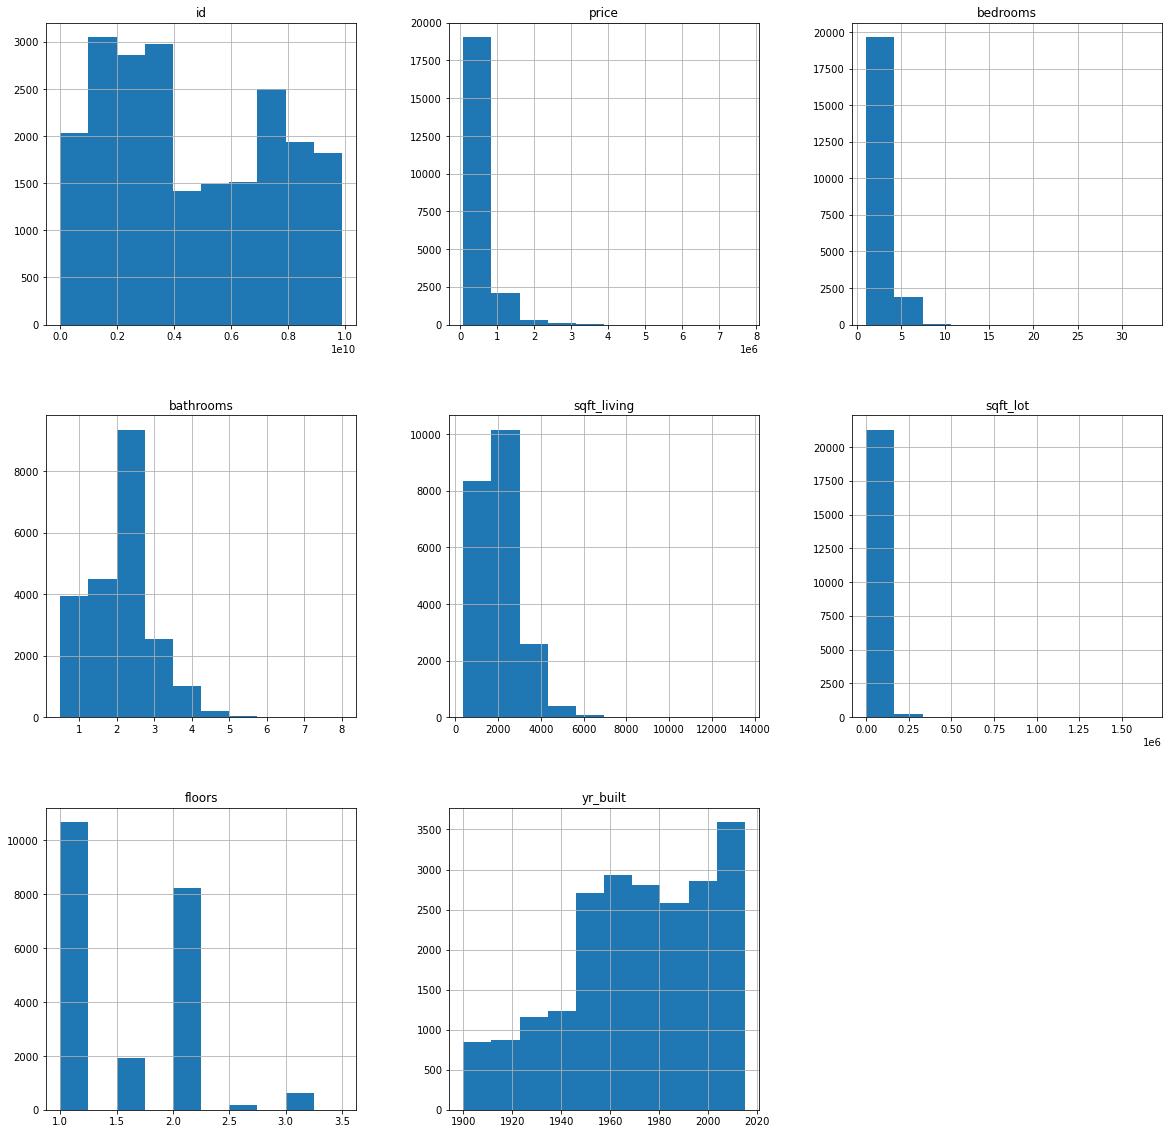

In [24]:
# plot histograms to show distributions of datasets
df_limited.hist(figsize = (20,20));

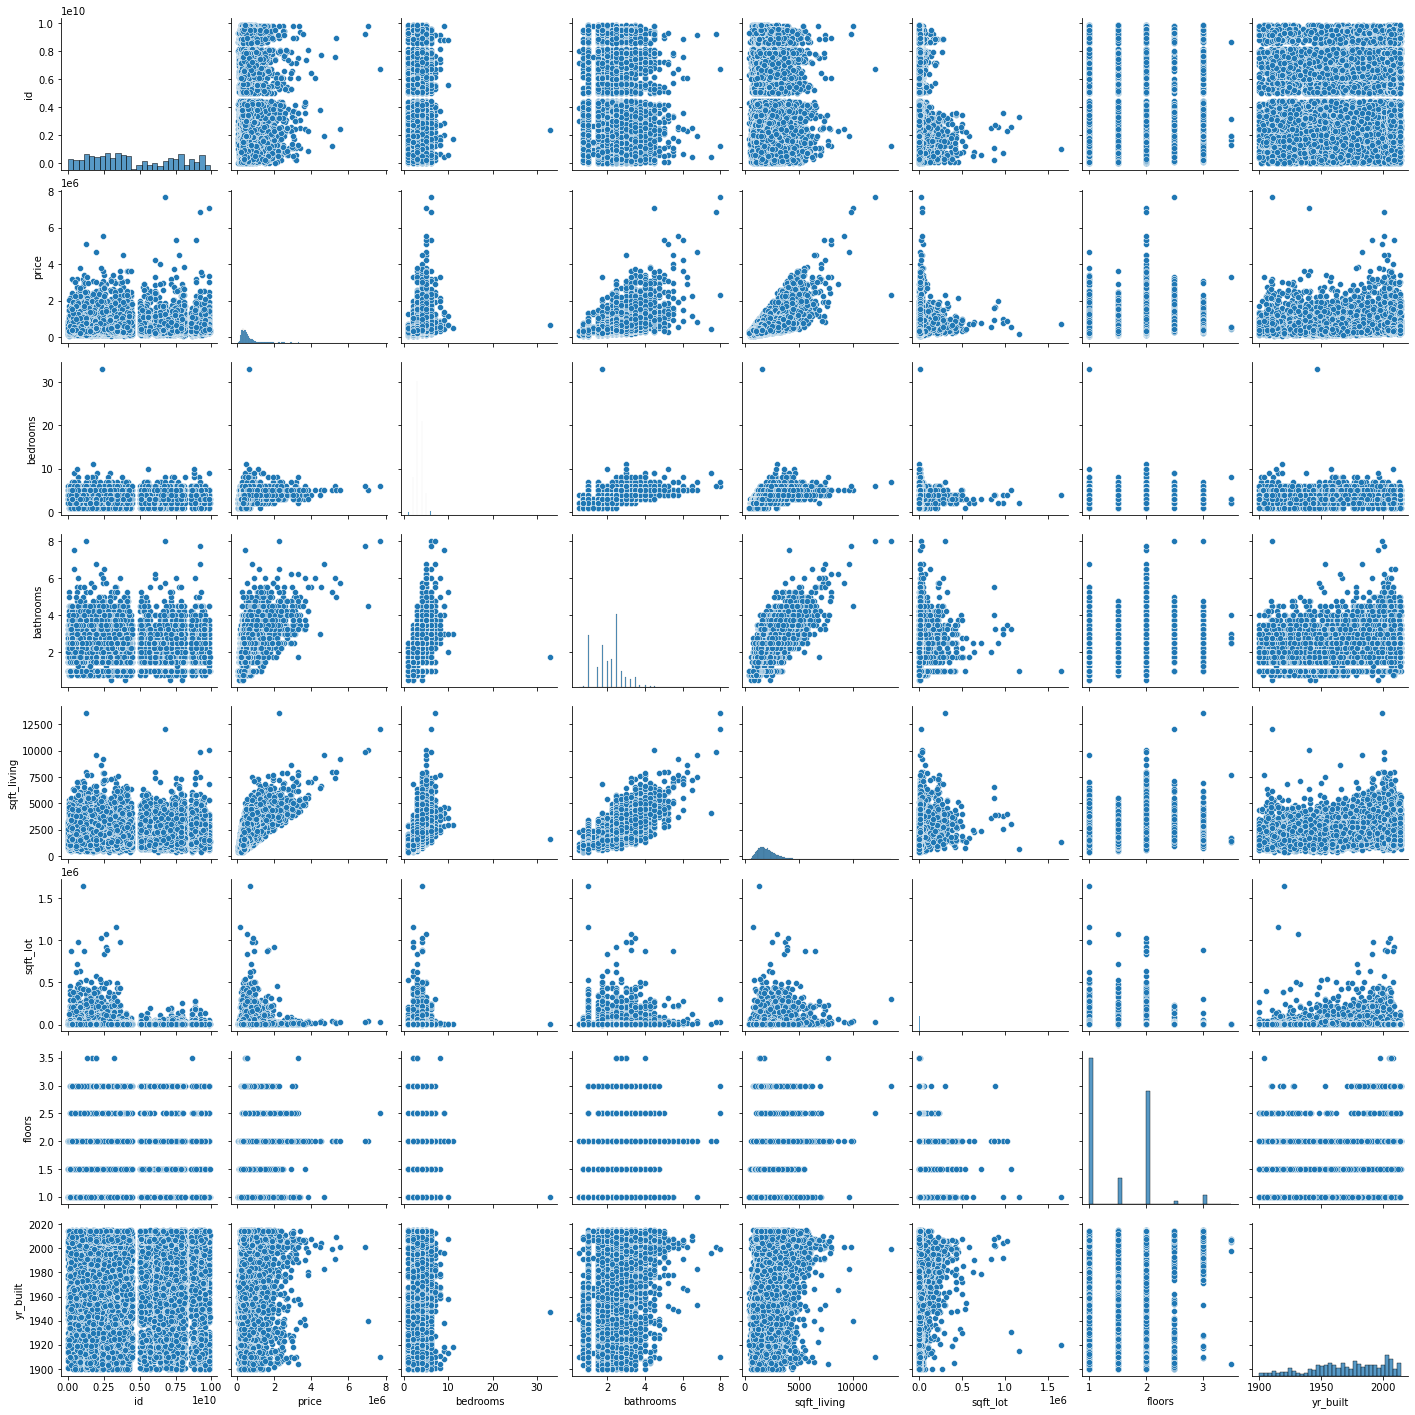

In [25]:
# Plot pairwise relationships in a dataset
sns.pairplot(df_limited)

This matrix plot returns scatterplots for relationships between two predictors. Some scatter plots reveal some sort of linear relationship between the predictors like bathrooms and sqft_living.  

In [26]:
for col in df_limited.columns:
    print ('{} : {}'.format (col, df_limited[col].nunique()))

id : 21420
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
condition : 5
grade : 11
yr_built : 116


Acording to the type of varibles, visualization and counts of unique variables, we can conclud that 'floors', 'condition', and 'grade','waterfront', are categorical variables. The linear regression model will not properly represent the categorical values, as it needs to be fed numeric values. For this reason, we will need to manage the categorical values, and convert them into formats that the linear regression model will better interpret.  

### Manage Chatecorial Features

For 'floors', 'condition', 'waterfront', and 'grade' implemented dummy coding with the pandas .get_dummies() method

In [27]:
# Create a list of all the categorical features
categorial_var = ['waterfront','floors', 'condition', 'grade']

# Create a dataframe with the new dummy columns created from the cols_to_transform list
ohc_df = pd.get_dummies(data = df_limited, columns = categorial_var , drop_first = True )
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
# modifide name of columns
ohc_df.columns = [col.replace ('.', '_') for col in ohc_df.columns]
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
# modifide name of columns
ohc_df.columns = [col.replace (' ', '_') for col in ohc_df.columns]
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Use histograms to display the new numerical columns that now reflect the various  categorical features.

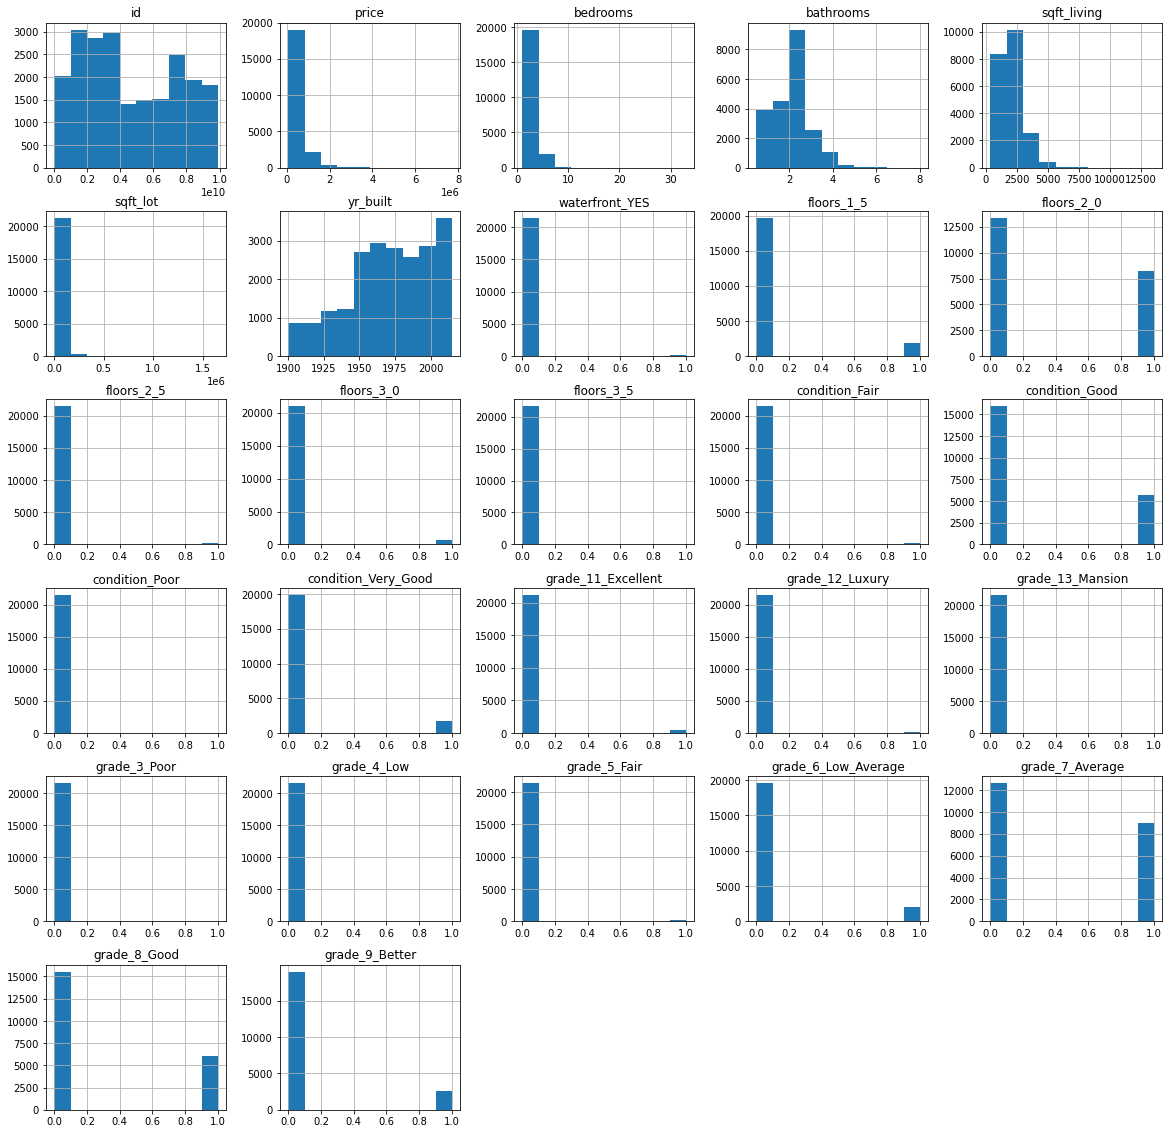

In [30]:
# Create histograms of the numeric features
ohc_df.hist(figsize = (20,20));

### Target Questions

Q1: How does the age of the houses impact the house price?

### Feture engineering

Feature engineering is the process of selecting and transforming the most pertinent variables from raw data while developing a predictive model using machine learning or statistical modelling. 
Age of house can be one of the feature that has a effect on price of houses. we can calculate age of house by subtracting 2022 from year of building. 

In [31]:
# Create new column
ohc_df['age'] = abs( ohc_df['yr_built'].sub(2022))

In [32]:
# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


In [33]:
# Remove column from dataframe
ohc_df = ohc_df.drop(['yr_built'], axis=1)

In [34]:
# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


Let's view the distribution of the age feature with a histogram and scatterplot.

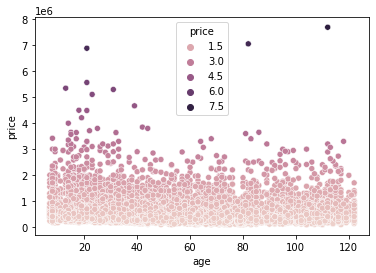

In [35]:
# Create a scatter plot of the age column
sns.scatterplot(x = ohc_df['age'], y= ohc_df['price'], hue = ohc_df['price']);

The scatter plot can not provide much information, and we plot the histogram.

<AxesSubplot:xlabel='age', ylabel='Count'>

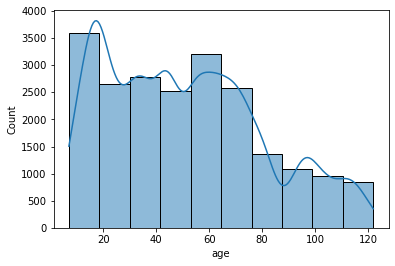

In [36]:
# Create seaborn distplot to visualize age value count distributions
sns.histplot(ohc_df['age'],bins=10, kde=True)

We can see that the number of houses in each age is not normally distributed. We know that normality helps our model predict with greater accuracy. By applying some transformations to this variable, and mapping its skewed distribution to a normal distribution, we can increase the performance of our models.



<AxesSubplot:>

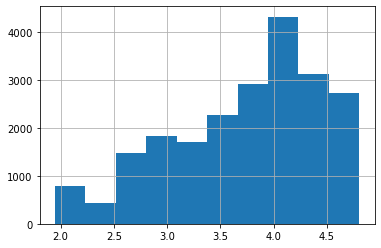

In [37]:
#log transfrom
np.log (ohc_df['age']).hist()

<AxesSubplot:>

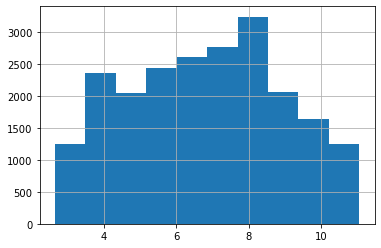

In [38]:
#square root tranform and its distribution
normalize_df_age = (ohc_df['age']**(1/2))
normalize_df_age.hist()

Although our new variables don't look perfectly normal, there is  an improvement in terms of skewness. 

<AxesSubplot:>

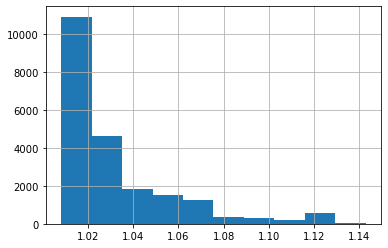

In [39]:
#reciprocal transformation and its plot
(1/ohc_df['age']+1).hist()

<AxesSubplot:>

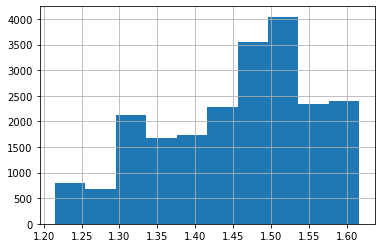

In [40]:
# Taking exponenent value as 1/8
(ohc_df['age']**(1/10)).hist()

Although our new variable does not look perfectly normal, there is an improvement in terms of skewness. We created a new dataframe focusing on the house age data. We can use the .groupby() method to group the data by age, and use a .agg() chain to fill in our dataframe with mean, minimum, and maximum values of the price per age.

In [41]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values
ohc_df['age'].describe()

count    21597.000000
mean        51.000324
std         29.375234
min          7.000000
25%         25.000000
50%         47.000000
75%         71.000000
max        122.000000
Name: age, dtype: float64

In [42]:
#Detect missing values 
ohc_df['age'].isnull().sum()

0

In [43]:
#Remove missing values
ohc_df.dropna(subset = ['age'],inplace=True)

In [44]:
#Detect missing values 
ohc_df['age'].isnull().sum()

0

The 'age' is pandas float data type. It is better to change it to an integer with the .astype() method.

In [45]:
#Chnag the data types to the specified type
ohc_df['age'] = ohc_df['age'].astype(int)

The lowest age for the house is 7, with the highest amount being 122. Age ranges can be determined by dividing this range into bins of the appropriate size to show the most eexpensive range of age. The number of bins was considered as 6.

In [46]:
# Determin production budget Bin Width 
age_range = ((ohc_df['age'].max()) - (ohc_df['age'].min()))/6

age_range

19.166666666666668

The bin width was determined 19.

In [47]:
# Create a list of integers, including infinity defined by numpy.
bins = [7, 26, 45, 64, 83,102, np.inf]
# Create a name for the bins expressing the range for each bin.
names = ['7-26', '26-45',
         '45-64', '64-83', '83-102', '102-122']
# Make a new categorical column names budget range, which is made of the 
# segments from the production budget column, 
ohc_df['age_cat'] = pd.cut(
    #cut at the bin values and label with the names list.
    ohc_df['age'], bins=bins, labels=names)

# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45


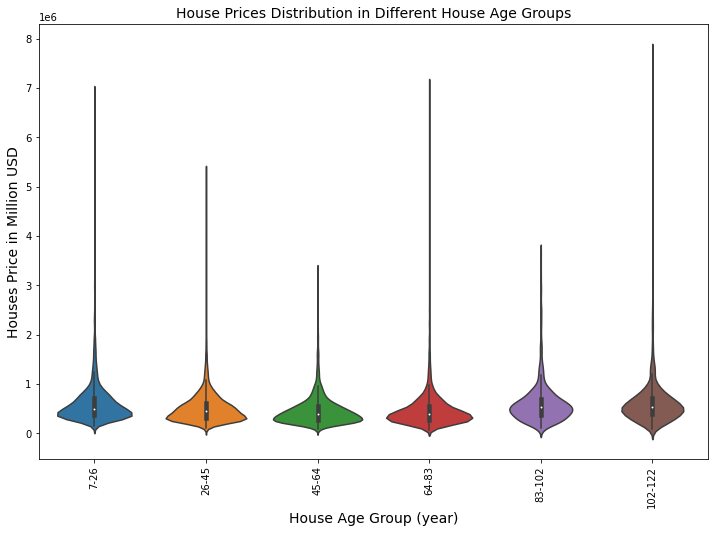

In [48]:
plt.figure(figsize=(12,8))
# Create a seaborn violinplot
sns.violinplot(x="age_cat", y="price", data=ohc_df)

#Set a title for the Axes
plt.title('House Prices Distribution in Different House Age Groups', fontsize=14)
# Label y-axis and set fontsize
plt.ylabel('Houses Price in Million USD', fontsize=14)
# Label x-axis and set fontsize
plt.xlabel('House Age Group (year)', fontsize=14)
# Set x ticks
plt.xticks(rotation='vertical')
# Show plot
plt.show()

As our violin plot showed, house age has a high range of prices. However, we have now created a new categorical variable. We will need to create dummy variables from this column  to be properly read by our model.

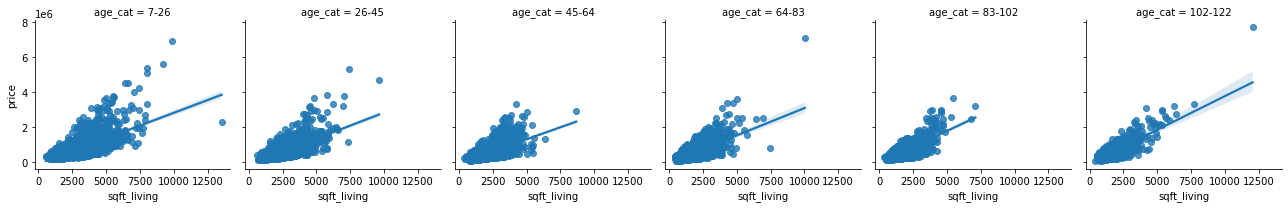

In [49]:
# Create a facetgrid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="age_cat") 
g.map(sns.regplot, "sqft_living", "price");

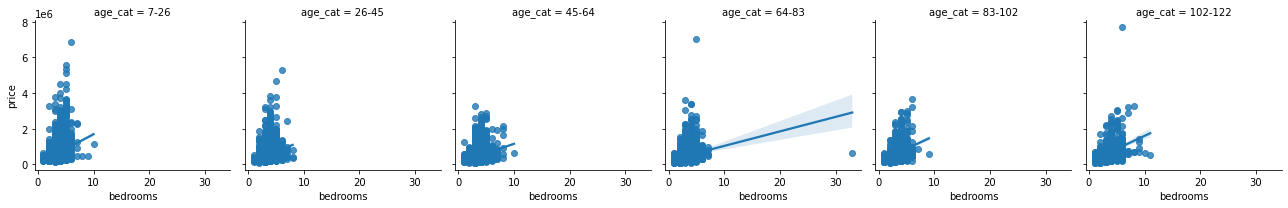

In [50]:
# Create a facetgrid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="age_cat") 
g.map(sns.regplot, "bedrooms", "price");

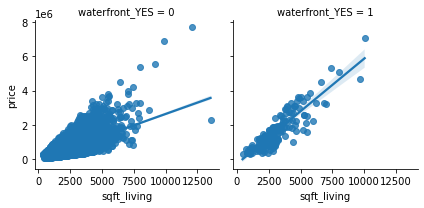

In [51]:
# Create a facetgrid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="waterfront_YES") 
g.map(sns.regplot, "sqft_living", "price");

In [52]:
# Create dataframe grouped by age with mea, min, max price aggregates
grouped_age = ohc_df.groupby('age_cat').agg({'price': ['mean', 'min', 'max']})
# Sort the dataframe by descending order of mean price values
grouped_age = grouped_age.sort_values(by=[('price','mean')], ascending=False)
# View new dataframe
grouped_age

price                     
                  mean       min        max
age_cat                                    
7-26     618235.274012  155000.0  6890000.0
102-122  608205.175172   80000.0  7700000.0
83-102   598961.214109  102500.0  3650000.0
26-45    526036.205766  100000.0  5300000.0
64-83    470969.133741   78000.0  7060000.0
45-64    469472.606798   86500.0  3300000.0

In [53]:
# Create dataframe grouped by age with mea, min, max price aggregates
grouped_age = ohc_df.groupby('age_cat').agg({'price': ['mean', 'min', 'max','count']})
# Sort the dataframe by descending order of mean price values

grouped_age = grouped_age.sort_values(by= 'age_cat' )
# View new dataframe
grouped_age

price                           
                  mean       min        max count
age_cat                                          
7-26     618235.274012  155000.0  6890000.0  5591
26-45    526036.205766  100000.0  5300000.0  4787
45-64    469472.606798   86500.0  3300000.0  4354
64-83    470969.133741   78000.0  7060000.0  3761
83-102   598961.214109  102500.0  3650000.0  1616
102-122  608205.175172   80000.0  7700000.0  1450

In [54]:
# Clean up the dataframe by removinf multiindexing, and renaming the columns
grouped_age.columns = ['price_mean', 'price_min','price_max','price_count']

In [55]:
# Further clean the dataframe by changing the index
grouped_age.reset_index(level=0, inplace=True)
# View dataframe
grouped_age

,age_cat,price_mean,price_min,price_max,price_count
0,7-26,618235.274012,155000.0,6890000.0,5591
1,26-45,526036.205766,100000.0,5300000.0,4787
2,45-64,469472.606798,86500.0,3300000.0,4354
3,64-83,470969.133741,78000.0,7060000.0,3761
4,83-102,598961.214109,102500.0,3650000.0,1616
5,102-122,608205.175172,80000.0,7700000.0,1450


Let's Visualize the distribution of 'age' by their price mean with a scatterplot.

<Figure size 864x576 with 0 Axes>

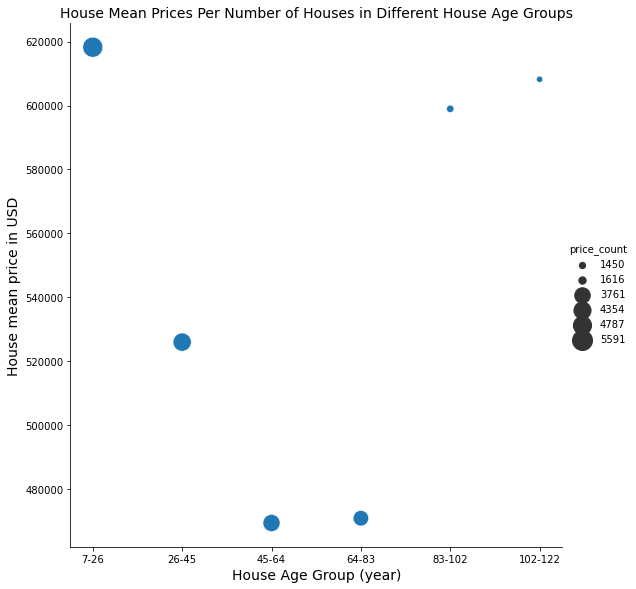

In [56]:
plt.figure(figsize=(12,8))
# Plot Houses Mean Prices Per Number of Houses in Different Age Group of the Houses
sns.relplot(x="age_cat", y="price_mean", size="price_count",
            sizes=(40, 400),
            height=8, data=grouped_age)

#Set a title for the Axes
plt.title('House Mean Prices Per Number of Houses in Different House Age Groups', fontsize=14)

#Set the label for the x-axis
plt.xlabel('House Age Group (year)', fontsize=14)

#Set the label for the y-axis
plt.ylabel('House mean price in USD', fontsize=14);

plt.show()

Now with the new 'grouped_age' dataframe, we can view the average price of a house based on age in a scatterplot. 

<AxesSubplot:xlabel='age', ylabel='price'>

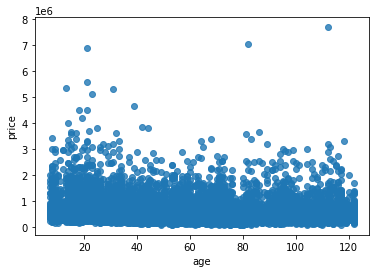

In [57]:
sns.regplot(data =ohc_df, x= ohc_df['age'], y=ohc_df['price'])

We also can use the joinplot to have a better insight into one of our columns. 

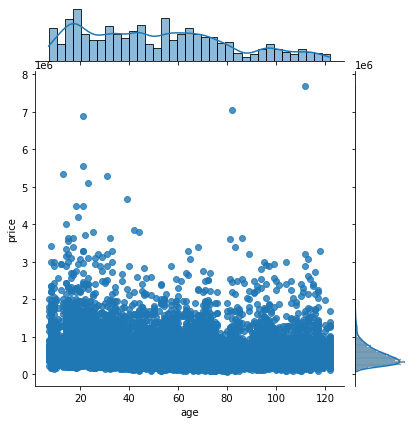

In [58]:
# Check for linearity in age feature of dataframe
sns.jointplot('age', 'price', data= ohc_df, kind='reg');

## Q2: How does house condition impact the house price? 

To answer this question, we can visualize the relation between house price and house condition. 

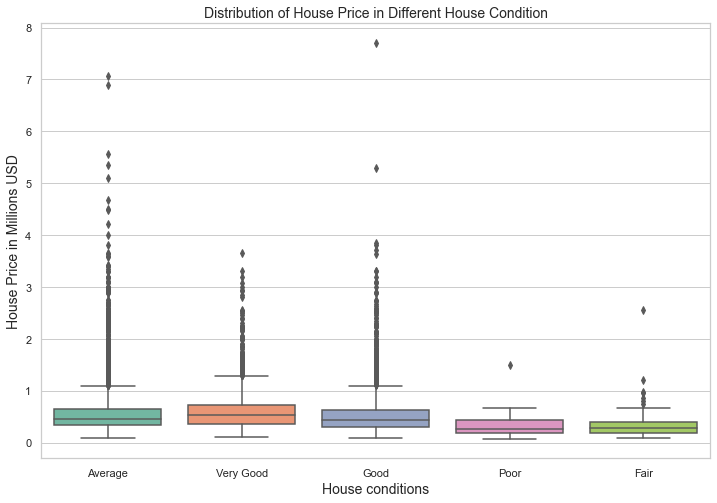

In [59]:
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12, 8))
# Draw a seaborn boxplot based on studio and domestic gross
sns.set(style="whitegrid")
sns.boxplot(x=df_limited['condition'],
            y=df_limited['price']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of House Price in Different House Condition',fontsize=14)
# Set x-axis label and font size
plt.xlabel('House conditions', fontsize=14)
# Set y-axis label
plt.ylabel('House Price in Millions USD',fontsize=14)
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

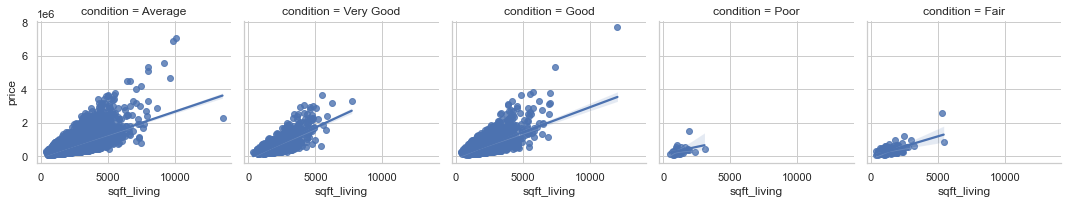

In [60]:
# Create a facetgrid displaying regression plots of each type of region

g = sns.FacetGrid(df_limited, col="condition") 
g.map(sns.regplot, "sqft_living", "price");



The results from our exploration inform us that:
- House price and square footage of the house have a relatively linear relation. 
- By increasing the square footage of the house the house prices increas
- Most of the house are in average condition
- Very good condition in comparison to square footage of the house has a lower impact on house prices

# Model Data

## Linear Regression Assumptions


The dataset was cleaned and categorical variables were managed. By checking linearity, multicollinearity, and homoscedasticity we can check our dataset is agreeable with the assumptions of linear regression then we would have a feasible prediction.

## Linearity

For checking linearity, the dependent variable and independent variables should have a linear relationship. If they do not, our linear regression model will not do a great job at modeling the data. Pairplots is useful to check the linearity assumption.

In [61]:
# drop a column
model_df = ohc_df.drop (['age_cat'], axis=1)

In [62]:
# To view a small sample of DataFrame object
model_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


In [63]:
At first, we build a simple linear relation model between two pairs of features and check their linearity.

SyntaxError: invalid syntax (Temp/ipykernel_9644/172863597.py, line 1)

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

data = model_df
f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~sqft_living'
f4 = 'price~sqft_lot'
f5 = 'price~age'



model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()
model4 = smf.ols(formula=f4, data=data).fit()
model5 = smf.ols(formula=f5, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid
resid5 = model5.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)

Normal Q-Q Plots are a direct visual assessment of how well our residuals match what we would expect from a normal distribution. The plot showed our features are not linearly related.  

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. It makes it hard to interpret of model and also creates an overfitting problem. The first simple method to check multicollinearity is to plot the correlation matrix of all the independent variables. 

In [ ]:
# Create a correlation table with 
correlation_df = model_df.corr()
correlation_df

The .corr() method is a Pandas method that allows us to compute a pairwise correlation on a dataframe’s columns. With the price column and row, we can see which features have the highest correlation with our target. Based on the table, we can see that bedrooms, bathrooms, and sqft_living, have a very high correlation between prices. We can also generate very neat heat maps of the correlation coefficients that are generated when we run .corr(). We can do this by leveraging Seaborn.

In [ ]:
# Set figure size
plt.figure(figsize=(8,8))

# Seaborn heatmap visualization
sns.heatmap(ohc_df.corr(), annot=True)

In [ ]:
# Set figure size
plt.figure(figsize=(8,8))
# Create a dataframe from our .corr() method
m_blue_corr = model_df.corr()['bedrooms'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant - we are filtering for anything 0.5+
m_blue_corr_cols = [x for x,corr in m_blue_corr.iteritems() if abs(corr>0.75)]

# Seaborn heatmap visualization
# Here is where the plot is made!
sns.heatmap(ohc_df[m_blue_corr_cols].corr(), annot=True)

Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. We take 0.75 as a cut-off. It seems there is not a high correlation between variables, so there is no need to remove any of them to remove collinear features. 

## Baseline Model

We did the EDA of our dataset and clear some relations between our variables. After that, we checked the linearity and multicollinearity of our dataset because it affects the interpretability of a regression model since it compromises the statistical significance of independent variables. Now we build our baseline model and will evaluate the final model with it. 

A baseline model is essentially a simple model that acts as a reference in a machine learning project. we made our baseline model with Sci-kit Learn. The first step is to creat the X and y partitions of our data.

In [ ]:
# Rename our dataframe
p_df = model_df
# Create our X and y
y = p_df[['price']]
X = p_df.drop(['price'], axis=1)

In [ ]:
# Print a concise summary of a DataFrame
y.info()

In [ ]:
# Print a concise summary of a DataFrame
X.info()

The second step is to split our data into train and test sets by importing train_test_split from sklearn

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

For this model we will use a pretty common 80% train, 20% test ratio.

In [ ]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We will import the LinearRegression module and fit a model to our data. This is where we use the independent variables in our training data to 'teach' the model the patterns found within them so that it can predict the price of a house. We will use the prediction method to create our predictions.

In [ ]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Create linear regression object
linreg = LinearRegression()
# Fit lr object to training data
linreg.fit(X_train, y_train)

# Create price predictions on train and test data from the independant variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

By calculating the Mean Squared Error (MSE) we can evaluate our prediction price. The MSE measures how close a regression line is to a set of data points. There is no correct value for MSE. Simply put, the lower the value the better, and 0 means the model is perfect.

In [ ]:
# Compute MSE for train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Both the train and test sets have high MSE. If the test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases. So the model is poor at making predictions in general, and it is underfitting.

The Q-Q plot helps us to check whether  the prediction has a common distribution with theorized distribution

In [ ]:
# Import scipy.stats
import scipy.stats as stats
# Import statsmodels.api
import statsmodels.api as sm
# Create a qqplot showing distribution of data points compared to theorized distribution
sm.qqplot(y_hat_test, dist=stats.norm, line='45', fit=True)

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual data', color='g')
plt.title('Model vs Training Data')
plt.legend();

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='b')
plt.title('Model vs Test set')
plt.xlabel(' Price Actual Value')
plt.ylabel ('Price Predicted values')
plt.legend();

## Statsmodels Linear Regression

In [ ]:
# Import OLS from statsmodels
from statsmodels.formula.api import ols

In [ ]:
# View the columns in our dataframe
p_df.columns

In [ ]:
# Name the dependent and indepenent variables to be fed into our model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model = ols(formula=formula, data=model_df).fit()
# Call summary to return data on model
model.summary()

In [ ]:
plt.style.use('ggplot')
resid1 = model.resid


fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

## Interpreting the Regression Results

Important components within the results include:
. Adjusted. R-squared reflects the fit of the model. The Adj R-squared value is 0.67 which indicates we should improve our model.
. P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant

To improve our model we can make a new dataframe by removing  variables with p-values below our alpha.

In [ ]:
# Remove the features with p-values above alpha
p_df = model_df.drop(['floors_1_5', 'floors_2_0', 'floors_3_5', 'condition_Poor'], axis=1)

In [ ]:
# Check changes occurred
p_df.columns

In [ ]:
# Name the dependent and indepenent variables to be fed into our model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_2_5', 'floors_3_0', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model = ols(formula=formula, data=model_df).fit()
# Call summary to return data on model
model.summary()

From the last model, we can conclude that:

- The Adj R-value is 0.675 which means 67.5% of the variations in price y are explained by the features in our model.
- The variables have high values for coefficients and grade_13_Mansion has the highest coefficient. Other determiners for house price are waterfront views, condition, floors, age, and bathrooms.

## Model Refinements

According to the model interpretation, we should improve our model's predicted performance. The first step can be to check the outliers. There are many techniques to identify outliers. the Z-score is one of the simplest and one of the most popular techniques for outlier detection that works well for several  cases.

In [ ]:
# import stats
from scipy import stats

# Create the z_scores with stats library
z_scores = stats.zscore(model_df)

# Get the absolute z-scores
abs_z_scores = np.abs(z_scores)
# Filter those values that are within the 3rd standard deviation of our columns
filtered_entries = (abs_z_scores < 3).all(axis=1)
out_df = model_df[filtered_entries]

In [ ]:
# Check the size of the dataframe
out_df.info()

In [ ]:
# Check the size of the dataframe
model_df.info()

By comparing the count of the filtred dataframe with the original dataframe it showed about 31% of the data can be considered outliers.  When you determine outliers there are several ways to handle them like deleting them or using log, winsorize and similar methods. In the first step, we can try to build our model based on deleting the outliers. We can build our model based on the filtered dataframe to check the performance of prediction after deleting the outliers.

In [ ]:
out_df.columns

## Deleting Outliers

In [ ]:
# Create non-outlier model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_out = ols(formula=formula, data=out_df).fit()
model_out.summary()

As it can be seen in the table the model has a much lower adj. R squared value. Let's leave our outliers in the dataset.

## Feature Scaling and Normalization

Let's have a look at our features: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' and 'age' to check how we can transform each one of them!

In [ ]:
# Create histograms of the numeric features
specific_features = ohc_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'age']]

specific_features.hist(figsize = (8,8));



The plot show that skewness is an issue for all of our variables , and that some features e.g. 'sqft_lot' are much bigger in magnitude than others!
We can transform our data in two phases: first, try to make our data look more normal, and second,  perform feature scaling to manage the difference in magnitude!

### Log Transformation

 One common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact on the distribution.


In [ ]:
# Create new log transfromed features for a new dataframe
data_log= pd.DataFrame([])

data_log['bedrooms_log'] = np.log(model_df['bedrooms'])
data_log['bathrooms_log'] = np.log(model_df['bathrooms'])
data_log['sqft_living_log'] = np.log(model_df['sqft_living'])
data_log['sqft_lot_log'] = np.log(model_df['sqft_lot'])
data_log['age_log'] = np.log(model_df['age'])
data_log.hist(figsize  = [6, 6]);

In [ ]:
# Create a new linear model with these new log transformed features
X = data_log
y = model_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

In [ ]:
# Combine these log features with categorical features of original dataframe
df_log = pd.concat([data_log, model_df], axis=1)
df_log.columns

In [ ]:
# Drop the nonlogged versions of our log features from the dataframe
df_log_2 = df_log.drop(['id','bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot',
       'age'], axis=1)

In [ ]:
# Create a new model
X = df_log_2.drop(['price'], axis=1)
y = df_log_2['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

 We can observe that by transforming non-normally distributed features using log transformations, The  𝑅2  value of the model did not increase. This method did not lead to an improved model. A good rule of thumb is, however, to check your features for normality, and scale your features so they have similar magnitudes. 
 We can explore transformations to test for model performance. Other popular transformations includ: Min-max scaling, Standardization, Mean normalization, Unit vector transformation.

In [ ]:
# Create score root features for a new dataframe
data_score_root= pd.DataFrame([])

data_score_root['bedrooms_score'] = model_df['bedrooms'] **(1/2)
data_score_root['bathrooms_score'] = model_df['bathrooms']**(1/2)
data_score_root['sqft_living_score'] = model_df['sqft_living']**(1/2)
data_score_root['sqft_lot_score'] = model_df['sqft_lot']**(1/2)
data_score_root['age_score'] = model_df['age']**(1/2)
data_score_root.hist(figsize  = [6, 6]);


We can create a new dataframe by selecting columns from log transformation and score root transformation.

In [ ]:
# Create a new dataframe with original categorical features and transformed features
final_df = pd.concat([data_score_root, df_log_2], axis=1)
final_df.columns

In [ ]:
# Drop non-transformed features from the dataframe
final_df = final_df.drop(['bedrooms_log','bathrooms_score',
       'sqft_living_score', 'sqft_lot_score', 'age_log'], axis=1)
final_df.head()

In [ ]:
# Create a new model
X = final_df.drop(['price'], axis=1)
y = final_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

Although our new variables don't look perfectly normal, there is an improvement in terms of skewness. These transformations could not improve oue model.  Now, let's perform min-max scaling on the 'sqft_living' and 'sqft_lot' that have higher magnitude scales.

In [ ]:
# # Create new min-max scaling features for a new dataframe
sqft_living = data_log['sqft_living_log']
sqft_lot = data_log['sqft_lot_log']



scaled_sqft_living = (sqft_living - min(sqft_living)) / (max(sqft_living) - min(sqft_living))
scaled_sqft_lot = (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))


data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living_mm'] = scaled_sqft_living
data_cont_scaled['scaled_sqft_lot_mm'] = scaled_sqft_lot


data_cont_scaled.hist(figsize = [4, 4]);

Performing min-max scaling results in 'sqft_living' and 'sqft_lot' normal distributions. We can build a new model based on new modified features.

In [ ]:
# Create a new dataframe with original categorical features and transformed features
final_df = pd.concat([data_cont_scaled, df_log_2], axis=1)
final_df.columns

In [ ]:
# Drop non-transformed features from the dataframe
final_df = final_df.drop(['sqft_living_log', 'sqft_lot_log'], axis=1)
final_df.head()

In [ ]:
# Create a new model
X = final_df.drop(['price'], axis=1)
y = final_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

All of these variations of scaling and log transformations did not create a model that was much better than our original. We can explore the age categorial column and make dummy features from it to test if this will improve our performance.


In [ ]:
# To view a small sample of DataFrame object
ohc_df.head()

In [ ]:
# Create dummy variables of 'age_cat' column values
age_dum = pd.get_dummies(ohc_df['age_cat'])
age_dum.head()

In [ ]:
# Combine dummy variables with our original dataframe
age_df = pd.concat([final_df, age_dum], axis=1)
age_df.head()

In [ ]:
# Create new model
X = age_df.drop(['price'], axis=1)
y = age_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

The modification did not improve our model. let's remove the features with p-values above alpha.


In [ ]:
# Remove the features with p-values above alpha
p_df = age_df.drop(['floors_1_5','condition_Poor', 'condition_Fair', 'floors_3_5', '7-26', '26-45'], axis=1)

In [ ]:
# Create new model
X = p_df.drop(['price'], axis=1)
y = p_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

In [ ]:
# Create dummies of bedrooms
bed_dum = pd.get_dummies(ohc_df['bedrooms'], prefix='bed')

In [ ]:
# Add dummies to our previous dataframe
bed_df = pd.concat([ohc_df, bed_dum], axis=1)
bed_df.head()

In [ ]:
# Create dummies of age 
age_dum = pd.get_dummies(bed_df['age_cat'])


In [ ]:
# Add dummies to our previous dataframe
age_bed_dum = pd.concat([bed_df, age_dum], axis=1)
age_bed_dum.head()

In [ ]:
# Create dummies of bathrooms 
bath_dum = pd.get_dummies(age_bed_dum['bathrooms'],prefix = 'bath')

In [ ]:
# Add dummies to our previous dataframe
age_bed_bath_dum = pd.concat([age_bed_dum, bath_dum], axis=1)
age_bed_bath_dum.head()

In [ ]:
# Drop the bedrooms column from our dataframe
modle_df = age_bed_bath_dum.drop(['bedrooms', 'bathrooms','age','age_cat'], axis=1)
modle_df.head()

In [ ]:
# Create a new model with this dataframe
X = modle_df.drop(['price', 'id'], axis=1)
y = modle_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

We were able to  improve the Adj. R squared value by 0.016, but have introduced several features with p-values higher than 0.05. Let's remove those and try again.

In [ ]:
X = modle_df.drop(['price', 'id', 'floors_1_5','floors_2_0','condition_Poor','bed_6',
                'bed_7', 'bed_9', 'bed_10', 'bed_11', 'bed_33','7-26','26-45','bath_5.0',
                  'bath_5.75','bath_6.75','bath_7.5'], axis=1)
y = modle_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

We were able to increase the Adj R squared value by an entire thousandth through rigorous experimentation. Adj R = 0.691 means 69.1% of the variations in price 𝑦 are explained by the features in our model. It is not a strong R square. But the coefficients of the variables are quite strong.

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual data', color='g')
plt.title('Final Model vs Training Data')
plt.legend();

In [ ]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='b')
plt.title('Final Model vs Test set')
plt.xlabel(' Price Actual Value')
plt.ylabel ('Price Predicted values')
plt.legend();

# Interpret Model

## Linerity of Final Modle

In [ ]:
plt.style.use('ggplot')
resid1 = model_mm.resid


fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)


## Prediction vs. Actual values

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Create linear regression object
linreg = LinearRegression()
# Fit lr object to training data
linreg.fit(X_train, y_train)

# Create price predictions on train and test data from the independant variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
# Compute MSE for train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

According to the Adj R squared value, linearity of the model, and the MSE results we could not improve our model through the aforementioned process. Our model needs further refinements.

# Further Refinments

 Interaction between variables is where two or more variables interact in a non-additive manner when affecting a third variable. not accounting for interactions might lead to wrong results. 

In [ ]:
# check name of columns
modle_df.columns

In [ ]:
According to the EDA insights we chose the house condition feature to check its interaction with other features. 

In [ ]:
modle_df['condition_Very_Good'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

col = 'sqft_lot'

is_in = model_df.loc[model_df['condition_Very_Good'] == 1, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Very Good Condition Houses:   {linreg.coef_[0]:.2f}')

not_in = model_df.loc[model_df['condition_Very_Good'] == 0, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['price']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['price']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Not Very Good Condition houses:   {linreg.coef_[0]:.2f}')

ax.legend()

## Build a final model with interactions

Using the above interaction to build a new modle with 10-fold cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = modle_df.drop('price', axis=1)
y = modle_df['price']
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['condition_Very_Good*sqft_lot'] = final['condition_Very_Good'] * final['sqft_lot']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

The R squared value did not improve considering this interaction. So we do not consider this further refinement.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = modle_df.drop('price', axis=1)
y = modle_df['price']
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['sqft_living*sqft_lot'] = final['sqft_living'] * final['sqft_lot']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

In [ ]:
# Create a new column of our y_hat values in our last dataframe
modle_df['y_hat'] = model_mm.predict()
# Create a residual column in our last dataframe
modle_df['resid'] = modle_df['y_hat'] - modle_df['price']
# Use describe to view IQR of residuals
modle_df['resid'].describe()

In [ ]:
# Check if residuals are normally distributed
sns.distplot(modle_df['resid'], kde=True)

In [ ]:
low = modle_df[modle_df['resid'] < -100000]
high = modle_df[modle_df['resid'] > 100000]

print(f'The model underestimated {round(len(low)/len(modle_df)*100,2)}% of house prices by over 100,000')
print(f'The model overestimated {round(len(high)/len(modle_df)*100,2)}% house prices by over 100,000')

# Conclusion

- Adjusted R squared:  
>We were able to increase the Adj R sqaured value by an entire thousandth through rigorous experimentation. The basline model Adj R is 0.675. The final model Adj R is 0.691 which means 69.1% of the variations in price 𝑦 are explained by the features in our model. It is not a strong R square. But the coefficients of the variables are quite strong.

- Coefficients:
>Most variables have high values for coefficients. 'grade_13_Mansion' has the highest coefficient. Other determiners of house price are waterfront views, condition, floors, age, and bathrooms.

- P-values:
>All the p-values are quite low, which indicates there is sufficient evidence in the sample to conclude that a correlation exists.

- Mean Squared Error (MSE):
>The model underestimated 21.93% of house prices by over 100,000 and overestimated 26.32% of house prices by over 100,000.